# Análisis y modelización

## Añadir heatmap de datos faltantes!!!!!!!!
https://github.com/ResidentMario/missingno

## Carga de librerias

Para el correcto funcionamiento del análisis, se requiere el uso de las siguientes librerias:

In [1]:
import pandas as pd
import pandas_profiling
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

## Datos

### Contexto

¿Alguna vez te has preguntado cuándo es la mejor época del año para reservar una habitación de hotel? ¿O la duración óptima de la estancia para obtener la mejor tarifa diaria? ¿Y si quisiera predecir si un hotel es probable que reciba un número desproporcionadamente alto de solicitudes especiales?

Mediante este conjunto de datos de reservas de hotel nos proponemos explorar estas preguntas!

 ### Contenido
 
Este conjunto de datos contiene información sobre las reservas de un hotel de ciudad y de un hotel turístico, e incluye información como la fecha de la reserva, la duración de la estancia, el número de adultos, niños y/o bebés y el número de plazas de aparcamiento disponibles, entre otras cosas.

Toda la información de identificación personal se ha eliminado de los datos.

### Carga de datos

In [2]:
data = pd.read_csv('simple-hotels.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,177,2017,August,33,17,2,5,3,...,No Deposit,9.0,NaN,0,Transient,164.44,0,0,Canceled,2017-02-24
1,Resort Hotel,0,8,2017,February,7,17,1,2,2,...,No Deposit,250.0,NaN,0,Transient,67.00,1,0,Check-Out,2017-02-20
2,City Hotel,1,181,2017,June,23,8,0,2,2,...,Non Refund,58.0,NaN,0,Transient,100.00,0,0,Canceled,2017-01-24
3,City Hotel,0,45,2016,November,48,25,1,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,90.00,0,0,Check-Out,2016-11-28
4,City Hotel,1,64,2017,July,30,23,2,1,2,...,No Deposit,14.0,NaN,0,Transient,174.33,0,1,Canceled,2017-05-22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           10000 non-null  object 
 1   is_canceled                     10000 non-null  int64  
 2   lead_time                       10000 non-null  int64  
 3   arrival_date_year               10000 non-null  int64  
 4   arrival_date_month              10000 non-null  object 
 5   arrival_date_week_number        10000 non-null  int64  
 6   arrival_date_day_of_month       10000 non-null  int64  
 7   stays_in_weekend_nights         10000 non-null  int64  
 8   stays_in_week_nights            10000 non-null  int64  
 9   adults                          10000 non-null  int64  
 10  children                        10000 non-null  float64
 11  babies                          10000 non-null  int64  
 12  meal                            1

Podemos observar que nuestro data.set consta de 31 variables, 20 variables numericas, aunque muchas de ellas son categóricas, y el resto de tipo indefinido. Iremos analizando cada una de ellas de manera individual, y en caso de considerar conveniente, realizaremos la comparación con nuestra variable a predecir.

Vamos a observar un resumen sobre las variables numéricas:

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8654.000000,559.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.375100,105.393800,2016.166900,27.267700,15.864100,0.927100,2.516500,1.869600,0.108000,0.008500,0.031900,0.087500,0.127400,0.218700,89.090941,188.869410,2.201200,102.150192,0.06440,0.579300
std,0.484173,108.267682,0.705616,13.671588,8.725941,0.990396,1.882892,0.572912,0.405157,0.093961,0.175743,0.852242,1.269067,0.684045,112.721390,138.001931,17.405235,48.778734,0.24629,0.797731
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,49.000000,0.000000,68.530000,0.00000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,94.000000,0.00000,0.000000
75%,1.000000,164.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,280.000000,0.000000,126.000000,0.00000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,10.000000,25.000000,27.000000,3.000000,2.000000,1.000000,26.000000,60.000000,16.000000,531.000000,530.000000,391.000000,388.000000,2.00000,5.000000


Mostramos la matriz de correlación entre las variables

In [5]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.300322,0.024577,-0.002117,-0.009072,-0.006372,0.019155,0.068910,0.013710,-0.030521,-0.079520,0.105622,-0.070294,-0.126024,-0.083498,0.022658,0.057597,0.049155,-0.202595,-0.238465
lead_time,0.300322,1.000000,0.039142,0.125362,-0.002752,0.093504,0.172592,0.123425,-0.039498,-0.015174,-0.116012,0.081086,-0.084707,0.003191,-0.074082,0.168360,0.165606,-0.064772,-0.119927,-0.103249
arrival_date_year,0.024577,0.039142,1.000000,-0.539884,-0.001400,0.028002,0.042828,0.028113,0.056933,-0.009332,-0.007453,-0.122741,0.029414,0.035844,0.073102,0.259735,-0.050217,0.217300,-0.011788,0.104497
arrival_date_week_number,-0.002117,0.125362,-0.539884,1.000000,0.064799,0.018045,0.011346,0.029802,-0.002981,0.004690,-0.040559,0.029336,-0.030383,-0.002817,-0.028062,-0.078391,0.011536,0.069965,-0.000309,0.023936
arrival_date_day_of_month,-0.009072,-0.002752,-0.001400,0.064799,1.000000,-0.031836,-0.027325,0.009958,-0.000346,-0.008105,-0.004933,-0.020335,0.011733,0.017864,0.013063,0.037240,0.034493,0.030133,0.005841,-0.003962
stays_in_weekend_nights,-0.006372,0.093504,0.028002,0.018045,-0.031836,1.000000,0.496751,0.090233,0.048036,0.023855,-0.088915,-0.017917,-0.055550,0.043907,0.162056,0.080099,-0.065167,0.062446,-0.017652,0.070293
stays_in_week_nights,0.019155,0.172592,0.042828,0.011346,-0.027325,0.496751,1.000000,0.089143,0.039615,0.040191,-0.097247,-0.018070,-0.053741,0.090570,0.197426,0.199179,-0.003306,0.063893,-0.016310,0.067509
adults,0.068910,0.123425,0.028113,0.029802,0.009958,0.090233,0.089143,1.000000,0.042151,0.013161,-0.147407,-0.005715,-0.127632,-0.033894,-0.044185,0.227391,-0.010477,0.247537,0.010616,0.119568
children,0.013710,-0.039498,0.056933,-0.002981,-0.000346,0.048036,0.039615,0.042151,1.000000,0.046815,-0.038558,-0.027081,-0.025207,0.052975,0.037633,0.002325,-0.033715,0.354569,0.029514,0.100985
babies,-0.030521,-0.015174,-0.009332,0.004690,-0.008105,0.023855,0.040191,0.013161,0.046815,1.000000,-0.010366,-0.008040,-0.009082,0.086219,0.033853,-0.023846,-0.011381,0.044477,0.062776,0.114425


Juntamos las columnas de año, mes y dia para crear un único datetime.
También añadimos una con el mes de forma numérica para usarlas posteriormente.

In [6]:
data['arrival_datetime'] = pd.to_datetime(data['arrival_date_year'].map(str) + "-" + data['arrival_date_month'].map(str) + "-" + data['arrival_date_day_of_month'].map(str))
data['arrival_month'] = data['arrival_datetime'].map(str).str[5:7]

In [7]:
data = data.sort_values(by=['arrival_datetime'], ascending=True)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_datetime,arrival_month
8095,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
5423,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
1182,City Hotel,0,257,2015,July,27,1,0,2,1,...,NaN,0,Transient,80.00,0,0,Check-Out,2015-07-03,2015-07-01,07
5157,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
5772,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,Resort Hotel,0,2,2017,August,35,31,0,3,2,...,NaN,0,Transient-Party,200.00,0,2,Check-Out,2017-09-03,2017-08-31,08
3980,City Hotel,0,63,2017,August,35,31,0,3,3,...,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31,08
94,City Hotel,1,218,2017,August,35,31,2,5,3,...,NaN,0,Transient,162.00,0,0,Canceled,2017-01-31,2017-08-31,08
8322,Resort Hotel,0,2,2017,August,35,31,0,3,2,...,NaN,0,Transient,245.33,0,2,Check-Out,2017-09-03,2017-08-31,08


Agrupamos los datos por la fecha total, y por año y mes para estudiar los cambios a lo largo del tiempo.

In [8]:
data_groupby_year_month = data.groupby(by=["arrival_date_year", "arrival_date_month"])
data_groupby_date = data.groupby(by=["arrival_datetime"])

### hotel
Primero comenzamos observando la columna de hotel



In [9]:
data['hotel'].describe()

count          10000
unique             2
top       City Hotel
freq            6564
Name: hotel, dtype: object

Como vemos, solo hay dos tipos distintos de hoteles, y el más repetido es el "City Hotel".



<AxesSubplot:>

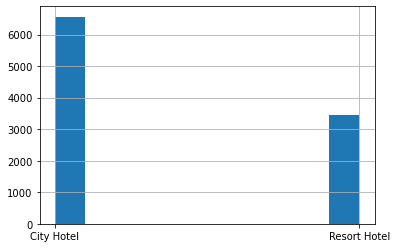

In [10]:
data['hotel'].hist()

##### Tabla de contingencias

In [11]:
pd.crosstab(data['hotel'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)


is_canceled,0,1
hotel,,
City Hotel,0.578458,0.421542
Resort Hotel,0.713620,0.286380


Creamos una tabla de contiengencias, y después esa misma tabla de contingencias pero observando los porcentajes, de tal forma que se puede ver que el porcentaje de cancelados es mayor en "City Hotel".


##### Evolución Histórica
Ahora vamos a obtener columnas númericas a partir de la columna "hotel" (**one hot encoder**) para poder agrupar cuantos hoteles se reservan cada mes.


In [12]:
data_hotel_and_date = data[['arrival_date_year', 'arrival_month', 'hotel']]
data_hotel_and_date = pd.get_dummies(data_hotel_and_date, columns=["hotel"])[['arrival_date_year', 'arrival_month', 'hotel_City Hotel', 'hotel_Resort Hotel']]
data_hotel_and_date = data_hotel_and_date.groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_hotel_and_date

hotel_City Hotel  hotel_Resort Hotel
arrival_date_year arrival_month                                      
2015              07                        122.0               111.0
                  08                        195.0               117.0
                  09                        276.0               132.0
                  10                        283.0               133.0
                  11                         89.0                86.0
                  12                        137.0               113.0
2016              01                        113.0                65.0
                  02                        172.0               136.0
                  03                        263.0               137.0
                  04                        300.0               155.0
                  05                        279.0               166.0
                  06                        318.0               115.0
                  07                        250.0               121.0
                  08                        277.0               137.0
                  09                        332.0               145.0
                  10                        347.0               183.0
                  11                        258.0               118.0
                  12                        225.0               131.0
2017              01                        220.0               106.0
                  02                        194.0               142.0
                  03                        330.0               131.0
                  04                        327.0               143.0
                  05                        343.0               158.0
                  06                        325.0               134.0
                  07                        298.0               177.0
                  08                        291.0               144.0

<Figure size 36000x720 with 0 Axes>

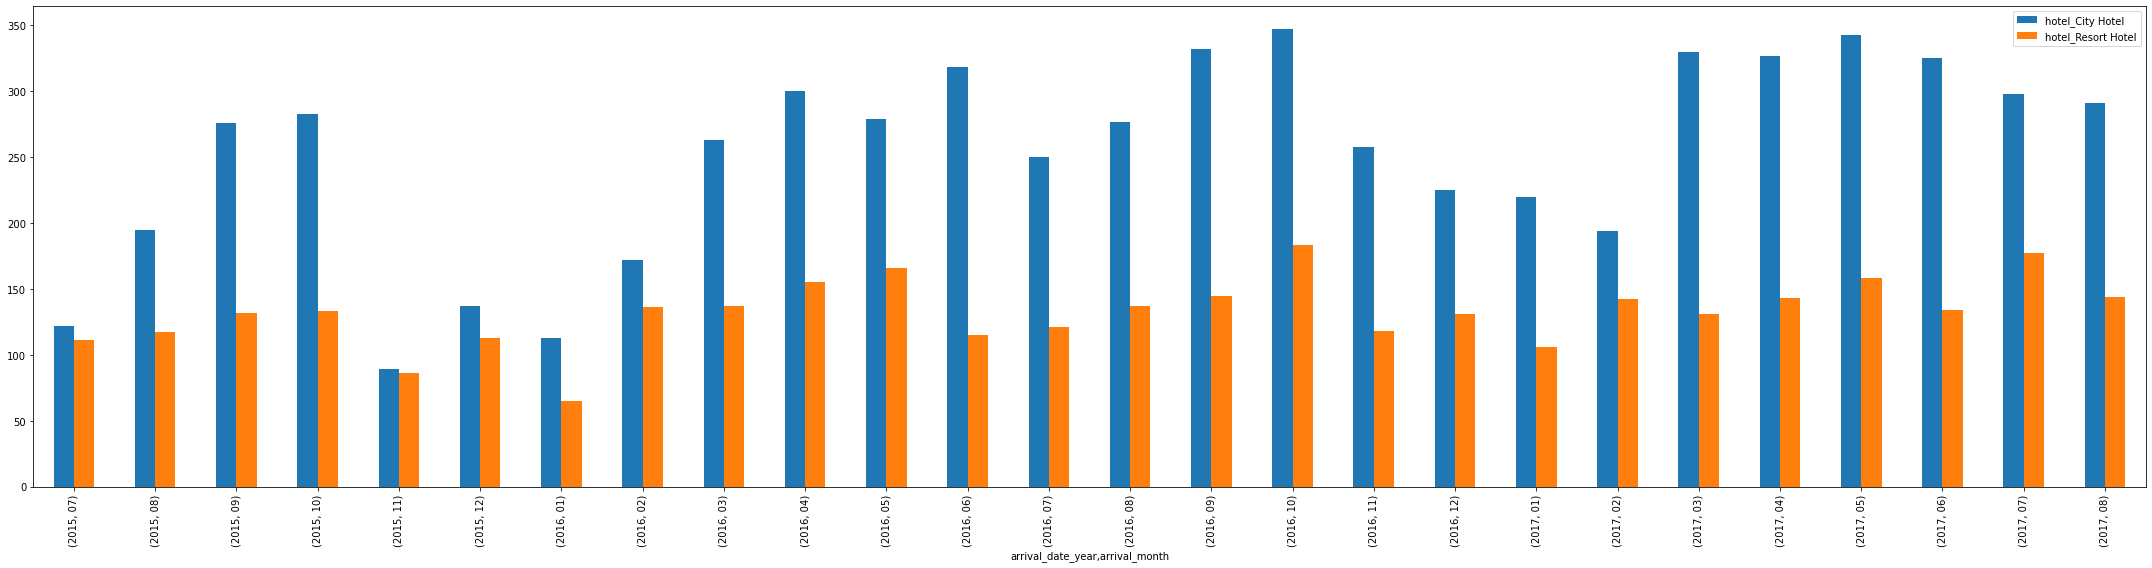

In [13]:
plt.figure(figsize=(500,10));
data_hotel_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### is_canceled

Se trata de unas de las variables más importantes, pues sería interesante tratar de predecirla en un futuro.

In [14]:
data['is_canceled'].describe()

count    10000.000000
mean         0.375100
std          0.484173
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

<AxesSubplot:>

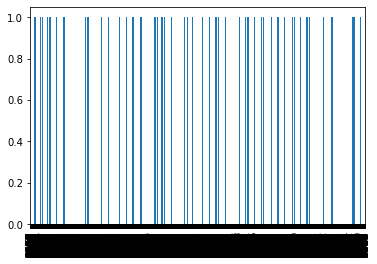

In [15]:
data['is_canceled'].plot(kind='bar')

##### Evolución histórica

In [16]:
data_canceled_and_date = data[['arrival_date_year', 'arrival_month', 'is_canceled']].groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_canceled_and_date.head()

is_canceled
arrival_date_year arrival_month             
2015              07                     106
                  08                     139
                  09                     167
                  10                     129
                  11                      43

<Figure size 36000x720 with 0 Axes>

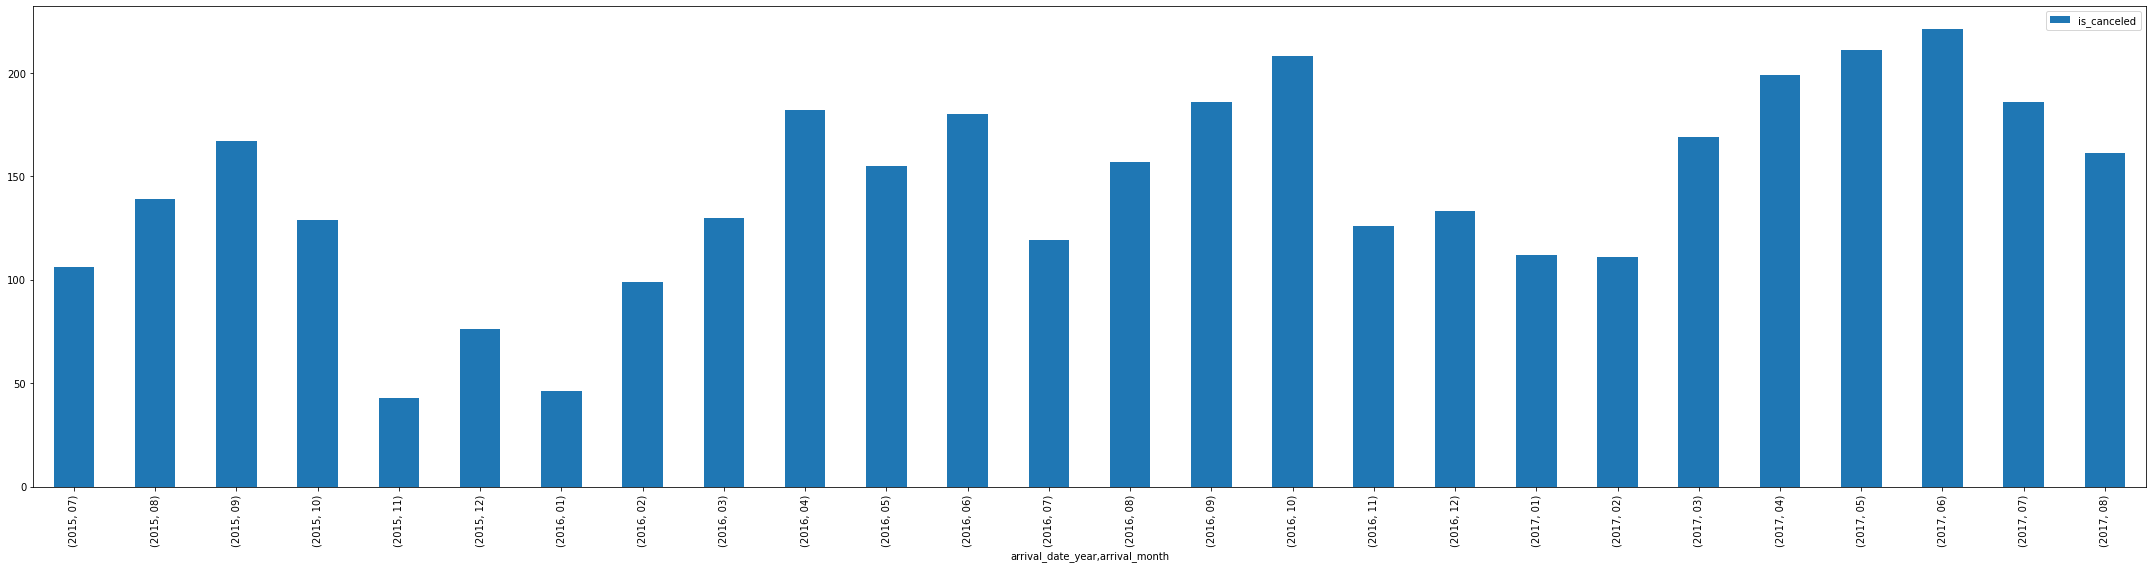

In [17]:
plt.figure(figsize=(500,10));
data_canceled_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### lead_time 	


In [18]:
data['lead_time'].describe()

count    10000.000000
mean       105.393800
std        108.267682
min          0.000000
25%         18.000000
50%         70.000000
75%        164.000000
max        629.000000
Name: lead_time, dtype: float64

<AxesSubplot:>

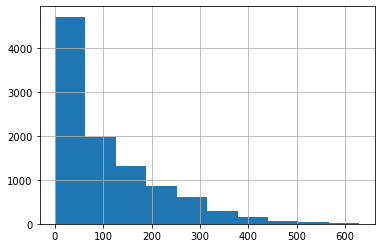

In [19]:
data['lead_time'].hist()

##### Evolución histórica
Vamos a mostrar como ha ido evolucionando la variable a lo largo de cada mes.

In [20]:
data_lead_time_and_date = data[['arrival_date_year', 'arrival_month', 'lead_time']].groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_lead_time_and_date.head()

lead_time
arrival_date_year arrival_month           
2015              07                 30640
                  08                 32627
                  09                 50643
                  10                 42165
                  11                  7546

<Figure size 36000x720 with 0 Axes>

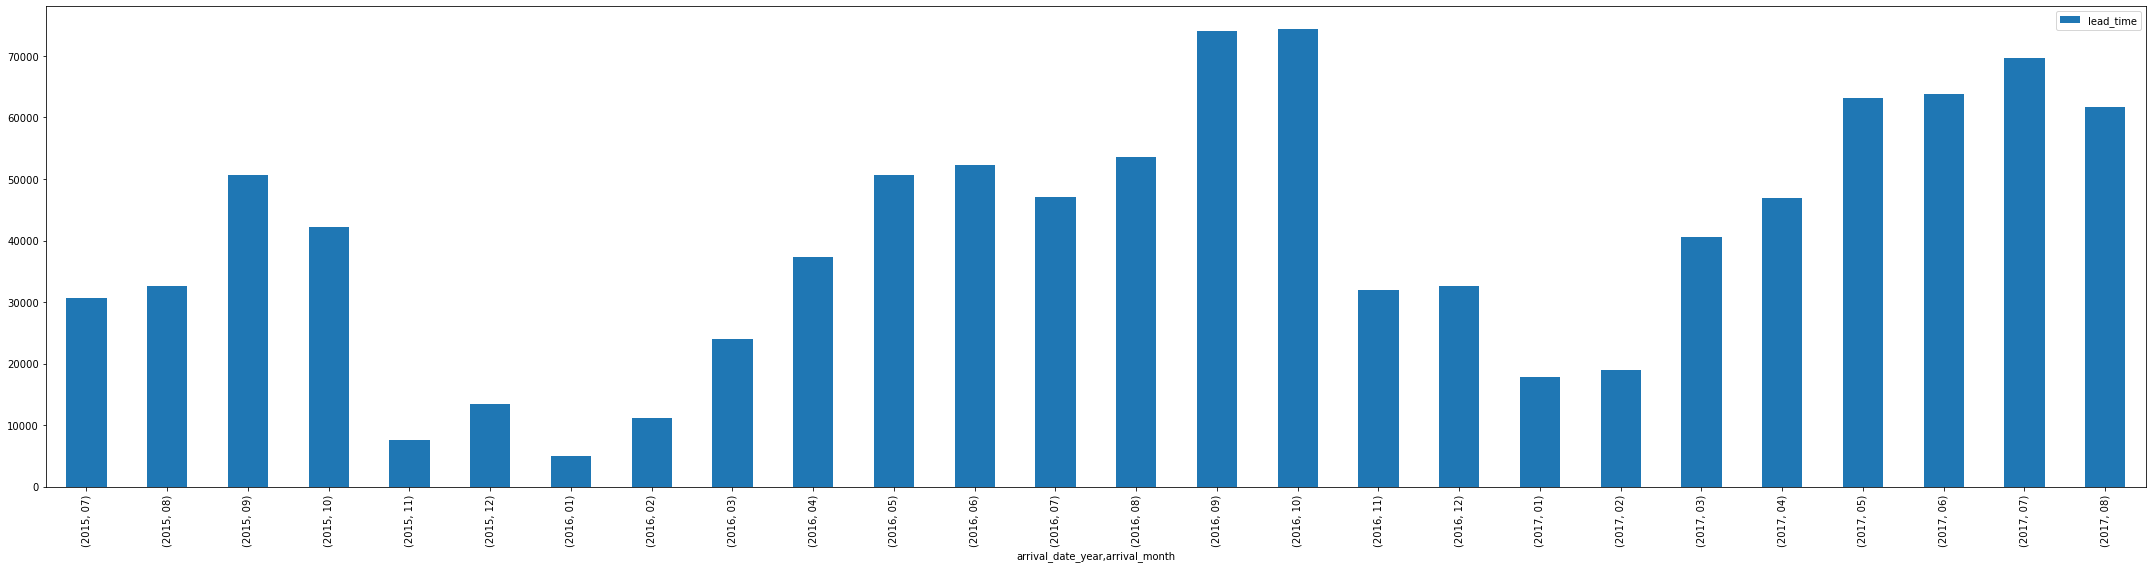

In [21]:
plt.figure(figsize=(500,10));
data_lead_time_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

KeyError: "None of [Index(['arrival_date_year', 'arrival_month'], dtype='object')] are in the [columns]"

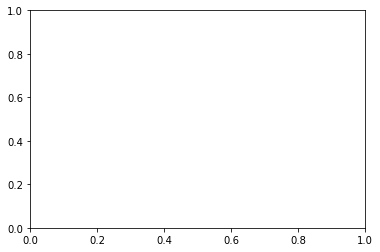

In [22]:
data_lead_time_and_date.plot.scatter(x=['arrival_date_year', 'arrival_month'], y=['lead_time'])

### arrival_date_year 	

In [ ]:
data['arrival_date_year'].describe()

In [ ]:
plt.xticks(rotation=45)
data['arrival_date_year'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del año y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_year = pd.crosstab(data['arrival_date_year'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_year

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_year.plot.bar(figsize=(30,8));
plt.tight_layout()

##### Comparación con is_canceled
Vamos a agrupar por año para ver como han ido cambiando las cancelaciones a lo largo de los años.

In [ ]:
data_year_and_canceled = data[['arrival_date_year', 'is_canceled']]
data_year_and_canceled = data_year_and_canceled.groupby(by=['arrival_date_year']).sum()
data_year_and_canceled

In [ ]:
plt.figure(figsize=(500,10));
data_year_and_canceled.plot(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### arrival_month 	
Usamos arrival_month(numérica), en lugar de arrival_date_month(categórica), pues son equivalentes.

In [ ]:
data['arrival_month'].describe()

In [ ]:
data['arrival_month'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del mes y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_month = pd.crosstab(data['arrival_month'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_month

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_month.plot(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por mes para ver como han ido cambiando las cancelaciones a lo largo de los meses.

In [ ]:
data_month_and_canceled = data[['arrival_month', 'is_canceled']]
data_month_and_canceled = data_month_and_canceled.groupby(by=['arrival_month']).sum()
data_month_and_canceled

In [ ]:
plt.figure(figsize=(500,10));
data_month_and_canceled.plot(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### arrival_date_week_number 	

In [ ]:
data['arrival_date_week_number'].describe()

In [ ]:
data['arrival_date_week_number'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función de la semana y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_weeknumber = pd.crosstab(data['arrival_date_week_number'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_weeknumber.head()

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_weeknumber.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de la semana para ver como han ido cambiando las cancelaciones a lo largo de las mismas.

In [ ]:
data_week_and_canceled = data[['arrival_date_week_number', 'is_canceled']]
data_week_and_canceled = data_week_and_canceled.groupby(by=['arrival_date_week_number']).sum()
data_week_and_canceled.head()

In [ ]:
plt.figure(figsize=(500,10));
data_week_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### arrival_date_day_of_month 	

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del día del mes y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_daynumber = pd.crosstab(data['arrival_date_day_of_month'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_daynumber.head()

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_daynumber.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

##### Comparación con is_canceled
Vamos a agrupar por día del mes para ver como han ido cambiando las cancelaciones a lo largo de los mismos.

In [ ]:
data_day_and_canceled = data[['arrival_date_day_of_month', 'is_canceled']]
data_day_and_canceled = data_day_and_canceled.groupby(by=['arrival_date_day_of_month']).sum()
data_day_and_canceled.head()

In [ ]:
plt.figure(figsize=(500,10));
data_day_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### stays_in_weekend_nights 	

In [ ]:
data['stays_in_weekend_nights'].describe()

In [ ]:
data['stays_in_weekend_nights'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de noches de fin de semana y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_weekend_nights = pd.crosstab(data['stays_in_weekend_nights'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_weekend_nights

Aquí se pueden ver algunos detalles significativos. Cuando se reservan 10 noches de fin de semana NADIE ha cancelado nunca la reserva. Y cuando se reservan 7 noches de fin de semana, TODO el mundo ha cancelado la reserva.

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_weekend_nights.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

##### Comparación con is_canceled
Vamos a agrupar por la variable para ver como han ido cambiando las cancelaciones en función de la misma.

In [ ]:
data_weekend_nights_and_canceled = data[['stays_in_weekend_nights', 'is_canceled']]
data_weekend_nights_and_canceled = data_weekend_nights_and_canceled.groupby(by=['stays_in_weekend_nights']).sum()
data_weekend_nights_and_canceled

Al ver estos resultado se aprecia que la probabilidad de antes es engañosa, ya que se debe a muestras muy pequeñas o incluso vacías.

In [ ]:
plt.figure(figsize=(500,10));
data_weekend_nights_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### stays_in_week_nights 	

In [ ]:
data['stays_in_week_nights'].describe()

In [ ]:
data['stays_in_week_nights'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de noches entre semana y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_week_nights = pd.crosstab(data['stays_in_week_nights'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_week_nights

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_week_nights.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

##### Comparación con is_canceled
Vamos a agrupar por la variable para ver como han ido cambiando las cancelaciones a lo largo de la misma.

In [ ]:
data_week_nights_and_canceled = data[['stays_in_week_nights', 'is_canceled']]
data_week_nights_and_canceled = data_week_nights_and_canceled.groupby(by=['stays_in_week_nights']).sum()
data_week_nights_and_canceled

In [ ]:
plt.figure(figsize=(500,10));
data_week_nights_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### adults 	

In [ ]:
data['adults'].describe()

In [ ]:
data['adults'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de adultos y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_adults = pd.crosstab(data['adults'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_adults

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_adults.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de adultos para ver como han ido cambiando las cancelaciones en función de los mismos.

In [ ]:
data_adults_and_canceled = data[['adults', 'is_canceled']]
data_adults_and_canceled = data_adults_and_canceled.groupby(by=['adults']).sum()
data_adults_and_canceled

In [ ]:
plt.figure(figsize=(500,10));
data_adults_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### children 	

In [ ]:
data['children'].describe()

In [ ]:
data['children'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de niños y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_children = pd.crosstab(data['children'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_children

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_children.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de niños para ver como han ido cambiando las cancelaciones en función de los mismos.

In [ ]:
data_children_and_canceled = data[['children', 'is_canceled']]
data_children_and_canceled = data_children_and_canceled.groupby(by=['children']).sum()
data_children_and_canceled

In [ ]:
plt.figure(figsize=(500,10));
data_children_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### babies

In [ ]:
data['babies'].describe()

In [ ]:
data['babies'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del nñumero de bebés y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_babies = pd.crosstab(data['babies'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_babies

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_babies.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de bebés para ver como han ido cambiando las cancelaciones en función de los mismos.

In [ ]:
data_babies_and_canceled = data[['babies', 'is_canceled']]
data_babies_and_canceled = data_babies_and_canceled.groupby(by=['babies']).sum()
data_babies_and_canceled

In [ ]:
plt.figure(figsize=(500,10));
data_babies_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### meal


Como podemos observar la variable info es una variable categorica con 5 valores distintos, que representan lo siguiente:

* BB: Bed & Breakfast

* HB: Half Board (Breakfast and Dinner normally)

* FB: Full Board (Beakfast, Lunch and Dinner)

* SC: Self Catering

* Undefined

Podemos observar que hay valores faltyas, para una posibnle posterior imputación

In [ ]:
data.meal.describe()

In [ ]:
data.meal.value_counts()

In [ ]:
data.meal.hist()

In [ ]:
ax = sns.stripplot(y="stays_in_weekend_nights", x="meal",hue="is_canceled", data=data)

### country

La variable country representa el país de la reserva, d emodo que constituye una variable categórica con 108 valores diferentes. El pais mas representado es Portugal.

In [ ]:
data.country.describe()

In [ ]:
data.country.value_counts()

Vemos que el pais del cual mas información poseemos es portugal, seguido de Reino Unido y Francia. Analizaremos el numero de cancelaciones por país de los 5 más abundantes

In [ ]:
data_topcountrys= data[data.country=='PRT']
data_topcountrys= data_topcountrys.append(data[data.country=='GBR'])
data_topcountrys= data_topcountrys.append(data[data.country=='FRA'])
data_topcountrys= data_topcountrys.append(data[data.country=='ESP'])
data_topcountrys= data_topcountrys.append(data[data.country=='DEU'])
data_prob_canceled_by_country = pd.crosstab(data_topcountrys['country'], data_topcountrys['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_country

In [ ]:
data_prob_canceled_by_country.plot.bar(figsize=(30,8))

Podemos observar que el ratio de cancelaciones en portugal es bastante mas alto al del resto de los paises top de nuestro dataset.

### market_segment

La variable market segment representa el segmento de mercado que ha realizado la contratacion. Es una varibale categorica con 7 valores distintos.
El término "TA" significa "Agentes de Viaje" y "TO" significa "Operadores Turísticos"

In [ ]:
data.market_segment.describe()

In [ ]:
data.market_segment.value_counts()

In [ ]:
data_prob_canceled_by_market = pd.crosstab(data['market_segment'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_market

In [ ]:
data_prob_canceled_by_market.plot.bar(figsize=(30,8))

Podemos observar que las reservas de grupos son las mas propensas a cancelar las reservas, siendo esta la opcion mas habital. En el lado opuesto tenemos el caso de la aviación.

### distribution_channel

Canal de distribución de reservas. El término "TA" significa "Agentes de Viaje" y "TO" significa "Operadores Turísticos"

In [ ]:
data.distribution_channel.describe()

In [ ]:
data.distribution_channel.value_counts()

In [ ]:
data_prob_canceled_by_market = pd.crosstab(data['distribution_channel'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_market

In [ ]:
data_prob_canceled_by_market.plot.bar(figsize=(30,8))

In [ ]:
Podemos observar que las reservas por TA/TO suelen cancelarse más amenudo

### is_repeated_guest

Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)

In [ ]:
data.is_repeated_guest.describe()

In [ ]:
data.is_repeated_guest.sum()

In [ ]:
data_repeted_guest=data[data.is_repeated_guest==1]
data_repeted_guest.is_canceled.sum()

In [ ]:
data_repeted_guest=data[data.is_repeated_guest==0]
data_repeted_guest.is_canceled.sum()

Podemos observar que de los repetidor, solo 52 cancelaron su viaje, es decir, 16%. Frente a los no repetidores, entre los que la tasa de cancelacion es 38%

### previous_cancellations

Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual

In [ ]:
data.previous_cancellations.describe()

In [ ]:
data.previous_cancellations.value_counts()

In [ ]:
data_prob_canceled = pd.crosstab(data['previous_cancellations'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled

In [ ]:
data_prob_canceled.plot.bar(figsize=(30,8))

Podemos observar, que la tonica general es no tener cancelaciones previas. Pero a mayor numero de cancelaciones previas, se cancela menos la reserva.

### previous_bookings_not_canceled

Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

In [ ]:
data.previous_bookings_not_canceled.describe()

In [ ]:
data.previous_bookings_not_canceled.value_counts()

In [ ]:
data_prob_ncanceled = pd.crosstab(data['previous_bookings_not_canceled'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_ncanceled

In [ ]:
data_prob_ncanceled.plot.bar(figsize=(30,8))

Podemos observar, que el comportamiento es similar al caso anterior, es decir, aquellos con pocas cancelaciones previas, es mas probable que cancelen, pero a mayor numero de cancelaciones general, es mas dificil que sea cancelado.

### reserved_room_type

Código de tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.

In [ ]:
data.reserved_room_type.describe()

In [ ]:
data.reserved_room_type.value_counts()

In [ ]:
data_prob_res = pd.crosstab(data['reserved_room_type'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

In [ ]:
data_prob_res.plot.bar(figsize=(30,8))

Podemos observar que las cancelaciones son similares en todos los tipos de habitacion reservada, salvo en 3 casos llamativos:
* Tipo H donde las cancelaciones son ligeramente superiores
* Tipo L no existen cancelaciones
* Tipo P solo existen cancelaciones

### assigned_room_type

Código del tipo de habitación asignada a la reserva. A veces el tipo de habitación asignada difiere del tipo de habitación reservada debido a razones de operación del hotel (por ejemplo, sobreventa) o por petición del cliente. El código se presenta en lugar de la designación por razones de anonimato.

In [ ]:
data.assigned_room_type.describe()

In [ ]:
data.assigned_room_type.value_counts()

Puede ser interesante si los tipos assignados son los tipos reservados, y la relación que ello tiene con la cancelación de la reserva

### booking_changes

Número de cambios/enmiendas hechos a la reserva desde el momento en que la reserva fue ingresada en el PMS hasta el momento del registro o cancelación.

In [ ]:
data.booking_changes.describe()

In [ ]:
data.booking_changes.value_counts()

In [ ]:
data_prob_res = pd.crosstab(data['booking_changes'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

In [ ]:
data_prob_res.plot.bar(figsize=(30,8))

Podemos destacar que las cancelaciones aumentan cuando sufren un mayor numero de cambios en las reservas, ademas para cambios pequeños, las reservas no se resienten en terminos de cancelación

### deposit_type

Indicación sobre si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: No Deposito - no se hizo ningún depósito; No Reembolso - se hizo un depósito con un valor por debajo del costo total de la estancia.

In [ ]:
data.deposit_type.describe()

In [ ]:
data.deposit_type.value_counts()

In [ ]:
data_prob_res = pd.crosstab(data['deposit_type'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

In [ ]:
data_prob_res.plot.bar(figsize=(30,8))

Muy destacable que las reservas sin refound son las mas canceladas

### agent


La identificación de la agencia de viajes que hizo la reserva

In [ ]:
data.agent.describe()

In [ ]:
data.agent.value_counts()

In [ ]:
data_prob_res = pd.crosstab(data['agent'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

Mucha cardinalidad en la variable, dado que hay 500+ valores de agencia y no tenemos traduccion de estos id (VAR CANDIDATA A DESAPARECER)